## Linear Regression
### on the Boston Housing data
### using sklearn

The Boston Housing data was retrieved from: [this GitHub](https://vincentarelbundock.github.io/Rdatasets/datasets.html) The data set is in R package MASS.

The file has been reduced to only rows medv and rm. The goal of this notebook is to predict medv (median home value in 1000s) from rm (the number of rooms in the home).

First, we use the following code to upload the file from disk to Google's server. Then in the second code block below, we use pandas and Google code to read the file into a data frame. 

In [1]:
# load the csv file up into the cloud

from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [2]:
import io
import pandas as pd


df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


Looking at the plot below, there does seem to be a strong linear relationship between number of rooms (X axis) and the median home value (y). The data was collectd in the 1970s, which explains the low home values.

Notice the row of data points across the top of the chart. This data set used '50' as a max home value in 1000s. More realistic results might be achieved by removing these rows, but we are leaving them in. 

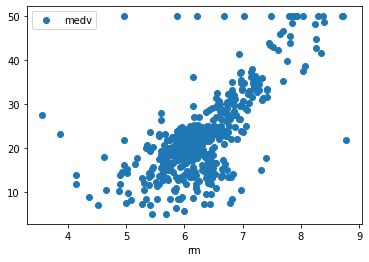

In [3]:
import seaborn as sb

df.plot(x='rm', y='medv', style='o')


Divide the data into train and test.



In [10]:
# train test split
from sklearn.model_selection import train_test_split

X = df[['rm']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (404, 1)
test size: (102, 1)


Train the algorithm using the default settings.

In [11]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# retrieve coefficients
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: -30.322473656188922
coefficients: [8.39945061]


In [13]:
# make predictions

y_pred = linreg.predict(X_test)

In [14]:
# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 34.79974182317179
correlation= 0.6609825809998007


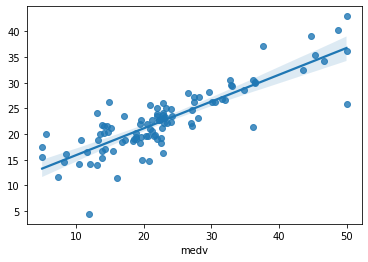

In [15]:
# plot correlation

sb.regplot(x=y_test, y=y_pred)